In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Data/kc_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# data.drop(columns=['id', 'zipcode', 'lat', 'long'], inplace=True)
data.drop(columns=['id'], inplace=True)

In [5]:
data.groupby('zipcode').median()['price'].sort_values()

zipcode
98002     235000.0
98168     235000.0
98032     249000.0
98001     260000.0
98188     264000.0
           ...    
98005     765475.0
98112     915000.0
98040     993750.0
98004    1150000.0
98039    1895000.0
Name: price, Length: 70, dtype: float64

In [6]:
data['zipcode'].value_counts(normalize=True)*100

98103    2.787424
98038    2.727231
98115    2.699449
98052    2.657777
98117    2.560541
           ...   
98102    0.481548
98010    0.463027
98024    0.370422
98148    0.263926
98039    0.231514
Name: zipcode, Length: 70, dtype: float64

In [7]:
zipcode_agg = data.groupby('zipcode')['price'].agg(['min', 'median', 'max', 'mean', 'count']).sort_values('median')
pd.set_option('display.max_rows', 70)

In [8]:
zipcode_agg

,min,median,max,mean,count
zipcode,,,,,
98002,95000.0,235000.0,389000.0,2.342840e+05,199
98168,78000.0,235000.0,600000.0,2.403284e+05,269
98032,85000.0,249000.0,545000.0,2.512962e+05,125
98001,100000.0,260000.0,850000.0,2.811949e+05,361
98188,110000.0,264000.0,707000.0,2.890783e+05,136
98198,95000.0,265000.0,1350000.0,3.028967e+05,280
98003,128000.0,267475.0,950000.0,2.941113e+05,280
98023,86500.0,268450.0,1280000.0,2.867428e+05,499
98148,105500.0,278000.0,600600.0,2.849086e+05,57


In [9]:
# diff = data[['sqft_living', 'sqft_living15']]
# diff['diff'] = diff['sqft_living'] - diff['sqft_living15']
# diff['diff'].value_counts(normalize=True)

In [10]:
data[['lat', 'long']]

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21592,47.6993,-122.346
21593,47.5107,-122.362
21594,47.5944,-122.299
21595,47.5345,-122.069


In [11]:
# # import module
# from geopy.geocoders import Nominatim
# # initialize Nominatim API 
# geolocator = Nominatim(user_agent="geoapiExercises")


# # Latitude & Longitude input
# Latitude = "47.5112"
# Longitude = "-122.257"
  
# location = geolocator.reverse(Latitude+","+Longitude)
  
# # Display
# print(location)

In [12]:
# import module
from geopy.geocoders import Nominatim

# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")


# Latitude & Longitude input
Latitude = "47.5941"
Longitude = "-122.299"

location = geolocator.reverse(Latitude+","+Longitude)

address = location.raw['address']

# traverse the data
city = address.get('city', '')
state = address.get('state', '')
country = address.get('country', '')
code = address.get('country_code')
zipcode = address.get('postcode')
print('City : ', city)
print('State : ', state)
print('Country : ', country)
print('Zip Code : ', zipcode)

City :  Seattle
State :  Washington
Country :  United States
Zip Code :  98144


In [13]:
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
data.nunique()

date              372
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     304
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [17]:
data.shape

(21597, 20)

In [18]:
data.dropna().shape

(15762, 20)

In [19]:
data.shape

(21597, 20)

In [20]:
data.isna().sum().sum()

6281

In [21]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


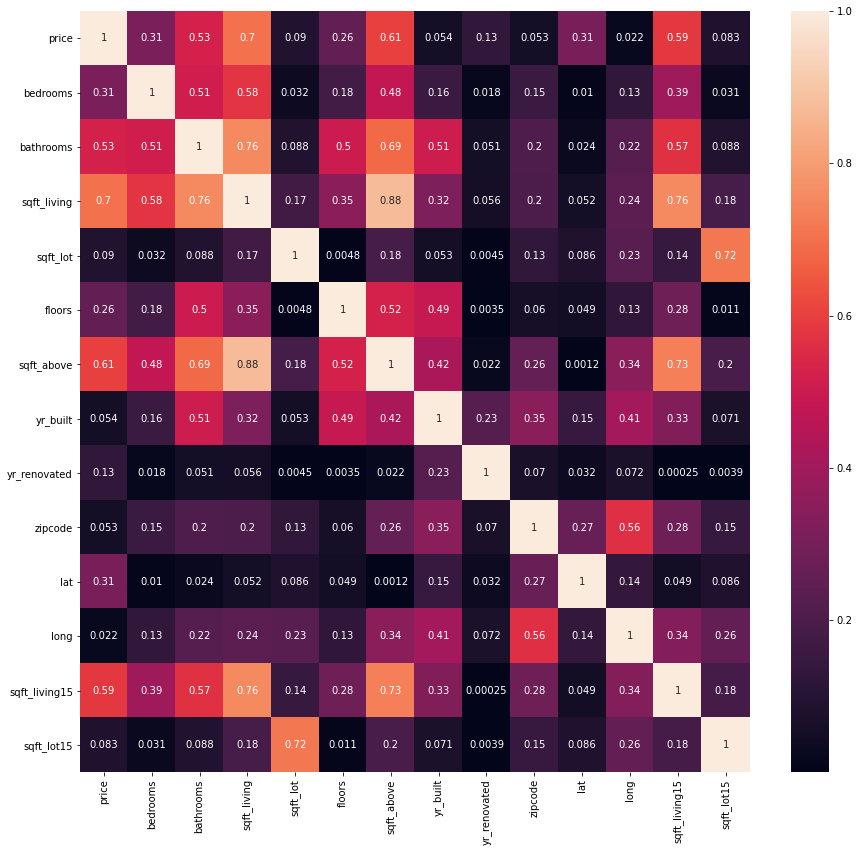

In [22]:
plt.figure(figsize=(15,14))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [23]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [24]:
df1 = data.drop(columns='price')

df1 = df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df1['pairs'] = list(zip(df1.level_0, df1.level_1))

df1.set_index(['pairs'], inplace = True)

df1.drop(columns=['level_1', 'level_0'], inplace = True)

df1.columns = ['cc']

df1.drop_duplicates(inplace=True)

df1[(df1.cc>.7) & (df1.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot, sqft_lot15)",0.718204


In [25]:
data['date'] = pd.to_datetime(data['date'])

In [26]:
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year

In [27]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [28]:
data.drop(columns='date', inplace=True)

price : 78000.0 450000.0 7700000.0


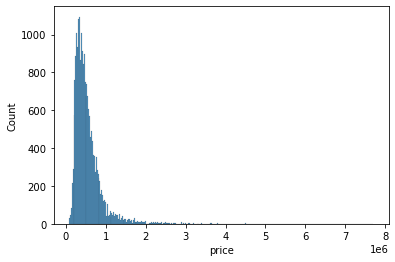

bedrooms : 1 3.0 33


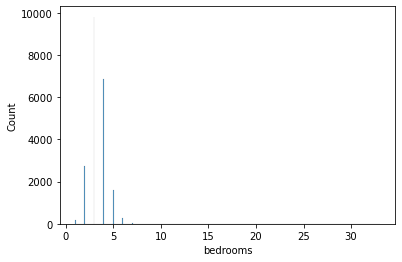

bathrooms : 0.5 2.25 8.0


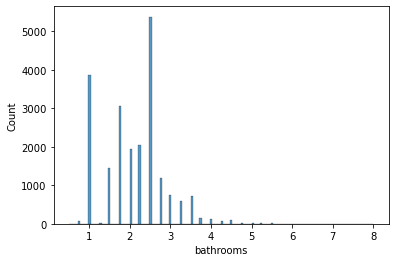

sqft_living : 370 1910.0 13540


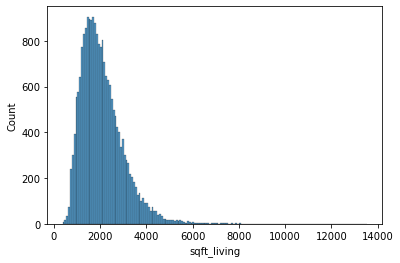

sqft_lot : 520 7618.0 1651359


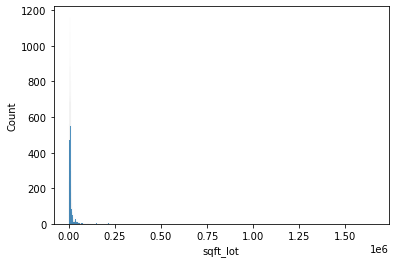

floors : 1.0 1.5 3.5


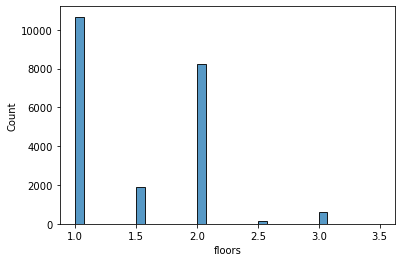

sqft_above : 370 1560.0 9410


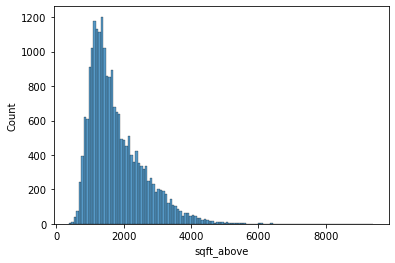

yr_built : 1900 1975.0 2015


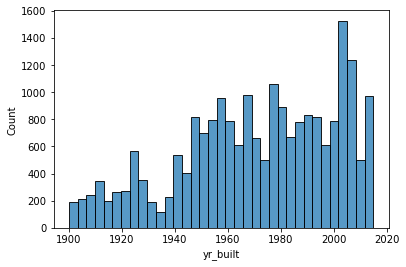

yr_renovated : 0.0 0.0 2015.0


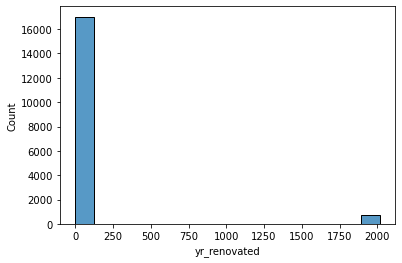

zipcode : 98001 98065.0 98199


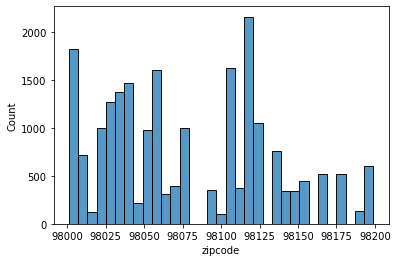

lat : 47.1559 47.5718 47.7776


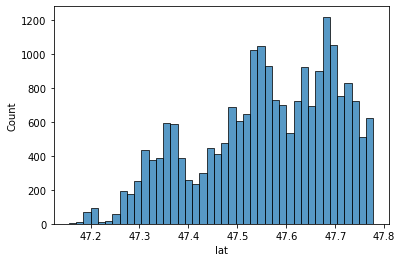

long : -122.519 -122.231 -121.315


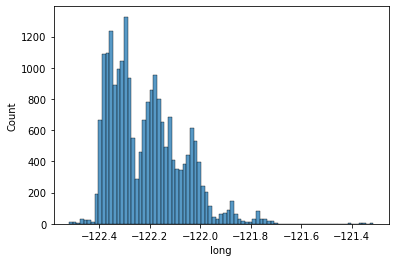

sqft_living15 : 399 1840.0 6210


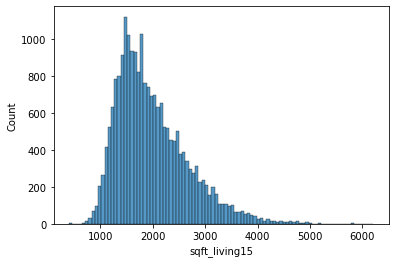

sqft_lot15 : 651 7620.0 871200


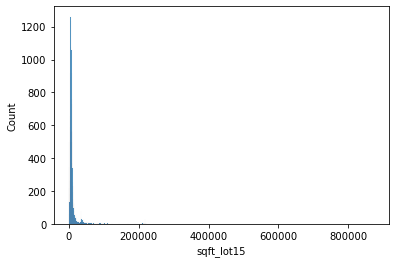

month : 1 6.0 12


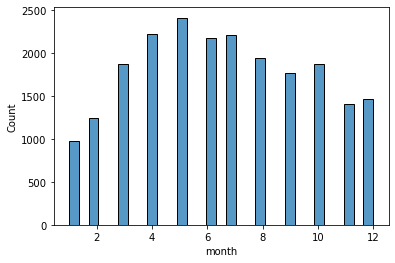

year : 2014 2014.0 2015


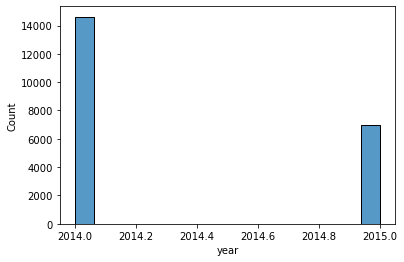

In [29]:
for col in data.columns:
    if data[col].dtype != 'object':
        print(col, ':', data[col].min(), data[col].median(), data[col].max())
        sns.histplot(data[col])
        plt.show()

In [30]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [31]:
value_counts_list = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'month', 'year']

for col in value_counts_list:
    print(data[col].value_counts(normalize=True)*100, '\n')

3     45.487799
4     31.865537
2     12.779553
5      7.413067
6      1.259434
1      0.907533
7      0.175950
8      0.060194
9      0.027782
10     0.013891
11     0.004630
33     0.004630
Name: bedrooms, dtype: float64 

2.50    24.896976
1.00    17.831180
1.75    14.113071
2.25     9.478168
2.00     8.936426
1.50     6.690744
2.75     5.486873
3.00     3.486595
3.50     3.384729
3.25     2.727231
3.75     0.717692
4.00     0.629717
4.50     0.463027
4.25     0.365792
0.75     0.328749
4.75     0.106496
5.00     0.097236
5.25     0.060194
5.50     0.046303
1.25     0.041672
6.00     0.027782
5.75     0.018521
0.50     0.018521
8.00     0.009261
6.25     0.009261
6.75     0.009261
6.50     0.009261
7.50     0.004630
7.75     0.004630
Name: bathrooms, dtype: float64 

1.0    49.418901
2.0    38.130296
1.5     8.843821
3.0     2.829097
2.5     0.745474
3.5     0.032412
Name: floors, dtype: float64 

NO     99.240414
YES     0.759586
Name: waterfront, dtype: float64 

NONE         90.1

In [32]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

Can ignore view, 90% has none anyway: or categorize into two later below

In [33]:
data['view'].value_counts(normalize=True)

NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

In [34]:
data['yr_renovated'].value_counts().to_dict()

{0.0: 17011,
 2014.0: 73,
 2003.0: 31,
 2013.0: 31,
 2007.0: 30,
 2000.0: 29,
 2005.0: 29,
 1990.0: 22,
 2004.0: 22,
 2009.0: 21,
 1989.0: 20,
 2006.0: 20,
 2002.0: 17,
 1991.0: 16,
 1998.0: 16,
 1984.0: 16,
 1999.0: 15,
 2008.0: 15,
 2010.0: 15,
 2001.0: 15,
 1983.0: 15,
 2015.0: 14,
 1985.0: 14,
 1986.0: 14,
 1987.0: 14,
 1994.0: 14,
 1992.0: 13,
 1993.0: 12,
 1997.0: 12,
 1995.0: 12,
 1996.0: 11,
 1988.0: 11,
 1970.0: 9,
 2011.0: 9,
 1980.0: 8,
 1982.0: 8,
 2012.0: 8,
 1979.0: 7,
 1977.0: 7,
 1968.0: 7,
 1975.0: 5,
 1964.0: 5,
 1969.0: 4,
 1963.0: 4,
 1973.0: 4,
 1981.0: 4,
 1965.0: 4,
 1978.0: 3,
 1960.0: 3,
 1958.0: 3,
 1956.0: 3,
 1955.0: 3,
 1945.0: 3,
 1972.0: 3,
 1967.0: 2,
 1957.0: 2,
 1940.0: 2,
 1974.0: 2,
 1962.0: 2,
 1953.0: 1,
 1950.0: 1,
 1934.0: 1,
 1944.0: 1,
 1976.0: 1,
 1948.0: 1,
 1946.0: 1,
 1959.0: 1,
 1971.0: 1,
 1951.0: 1,
 1954.0: 1}

Change column to is_renovated to separate renovated from not renovated:

In [35]:
def renovate(row):  
    if row['yr_renovated'] == 0.0:
        return 0
    else:
        return 1

In [36]:
data['is_renovated'] = data.apply(lambda row: renovate(row), axis=1)

In [37]:
data['is_renovated'].value_counts(normalize=True)

0    0.787656
1    0.212344
Name: is_renovated, dtype: float64

In [38]:
data.drop(columns='yr_renovated', inplace=True)

In [39]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'year', 'is_renovated'],
      dtype='object')

In [40]:
data['view'].value_counts(normalize=True)

NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

Change column to has_view to separate houses with view from houses without:

In [41]:
def view_or_not(row):  
    if row['view'] == 'NONE':
        return 0
    else:
        return 1
    
data['has_view'] = data.apply(lambda row: view_or_not(row), axis=1)

In [42]:
data.drop(columns='view', inplace=True)

In [43]:
data['has_view'].value_counts(normalize=True)

0    0.899292
1    0.100708
Name: has_view, dtype: float64

### ^ did not handle missing values above ^ fix

In [44]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'year', 'is_renovated', 'has_view'],
      dtype='object')

In [45]:
data['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1248.0    0.000046
2350.0    0.000046
652.0     0.000046
1008.0    0.000046
1284.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [46]:
# replace symbols with NaN
# data['sqft_basement'] = data['sqft_basement'].replace({'?':np.nan})

Change column to has_bsmt to separate houses with bsmt from houses without:

In [47]:
def bsmt_or_not(row):  
    if row['sqft_basement'] == '0.0':
        return 0
    else:
        return 1
    
data['has_bsmt'] = data.apply(lambda row: bsmt_or_not(row), axis=1)

data.drop(columns='sqft_basement', inplace=True)

data['has_bsmt'].value_counts(normalize=True)

0    0.593879
1    0.406121
Name: has_bsmt, dtype: float64

In [48]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year',
       'is_renovated', 'has_view', 'has_bsmt'],
      dtype='object')

***
Target: Price

Predictors:
- Discrete: bedrooms, bathrooms, floors, yr_built
- Continuous: sqft_living
- Categorical: zipcode (city), month (sold), is_renovated, has_view, has_bsmt


In [49]:
data.corr()['price']

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
month           -0.009928
year             0.003727
is_renovated     0.050430
has_view         0.353770
has_bsmt         0.175472
Name: price, dtype: float64

In [50]:
import statsmodels.api as sm

In [51]:
# all_endog = data['price']
# all_exog = data.drop(columns='price')
# all_model = sm.OLS(all_endog, sm.add_constant(all_exog)).fit()
# all_model.summary()

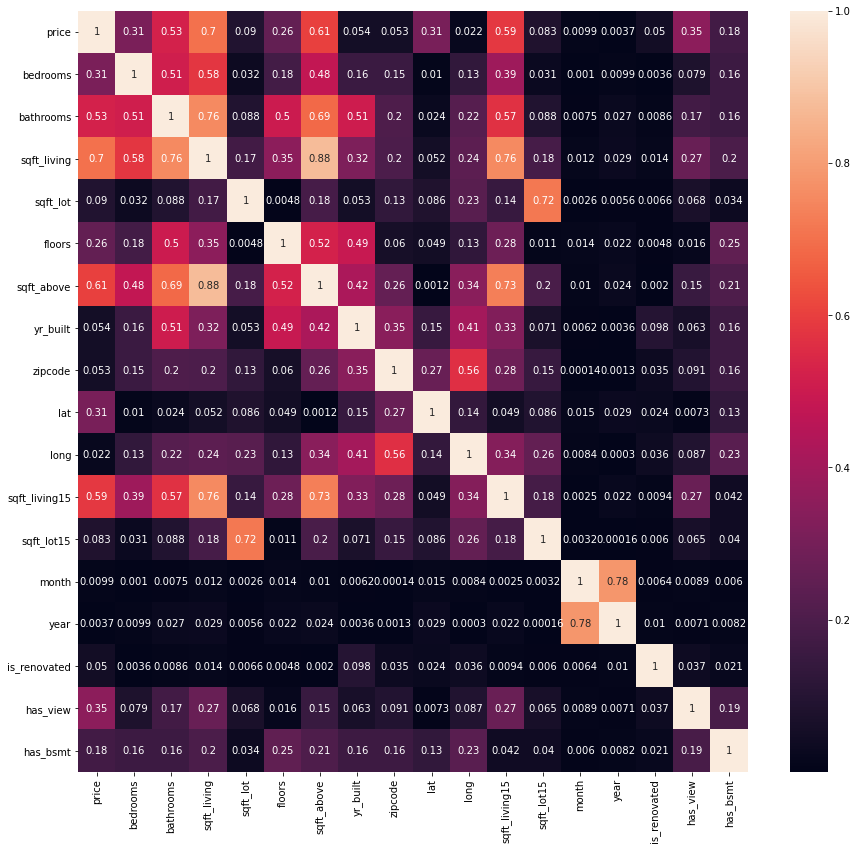

In [52]:
plt.figure(figsize=(15,14))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [ ]:
# Data prep and cleaning

# Change to datetime and add month
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['month'] = pd.DatetimeIndex(raw_data['date']).month

# Change waterfront missing value to No
raw_data.loc[(raw_data.waterfront.isnull()) & (raw_data.view == 'NONE'), 'waterfront'] = "NO"
# 200+ waterfront missing values left

# 63 view missing values

# Change condition to numerical value
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
raw_data['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical value
raw_data['grade'] = raw_data['grade'].map(lambda x: int(x.split(' ')[0]))

# Add has_basement column
raw_data['basement'] = raw_data['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

# Change some yr_renovated missing value to 0
raw_data.loc[(raw_data.yr_renovated.isnull()) & (raw_data.yr_built >= 2010), 'yr_renovated'] = 0
# Only changed about 200, but over 3000 yr_renovated missing values left

# Add age column
raw_data['age'] = raw_data['date'].dt.year - raw_data['yr_built']